In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers,models

In [3]:
# Load the Fashion MNIST dataset

Fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test)=Fashion_mnist.load_data()


#show the shape of the datasets

print("Training images shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test images shape:", x_test.shape)
print("Test lables shape:", y_test.shape)



29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test lables shape: (10000,)


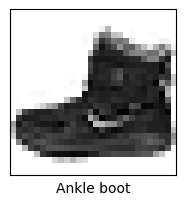

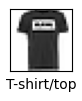

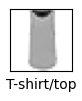

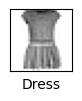

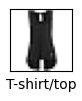

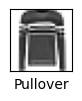

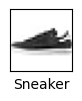

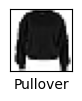

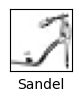

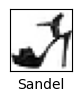

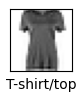

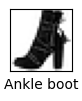

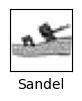

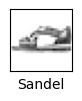

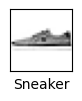

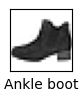

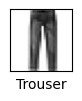

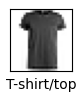

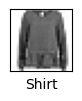

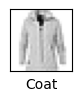

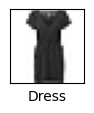

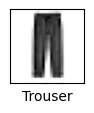

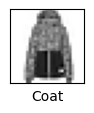

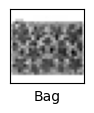

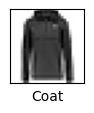

In [4]:
# Label names for the 10 classes

class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandel','Shirt','Sneaker','Bag','Ankle boot']

#Plot the first 25 training images with labels

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([]), plt.yticks([]),
  plt.grid(False)
  plt.imshow(x_train[i],cmap=plt.cm.binary)

  plt.xlabel(class_names[y_train[i]])
  plt.tight_layout()
  plt.show()

In [5]:
# Normalize the pixel values (convert 0-255 to 0-1)


x_train = x_train / 255.0
x_test = x_test / 255.0


#Reshape data to add channel dimension

x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

# print new shape to confirm

print("x_train shape:",x_train.shape)
print("x_test shape:",x_test.shape)


x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


In [7]:
from tensorflow.keras import layers,models

model = models.Sequential([layers.Conv2D(32,(3,3),activation='relu', input_shape=(28,28,1)),
                           layers.MaxPooling2D(2,2),
                           layers.Conv2D(64, (3,3),
                                         activation='relu'),
                           layers.MaxPooling2D(2,2),
                           layers.Flatten(),
                           layers.Dense(128,activation='relu'),
                           layers.Dense(10,activation='softmax')])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(x_train, y_train,epochs=10, validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 31ms/step - accuracy: 0.7754 - loss: 0.6246 - val_accuracy: 0.8740 - val_loss: 0.3547
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 29ms/step - accuracy: 0.8836 - loss: 0.3201 - val_accuracy: 0.8814 - val_loss: 0.3264
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 28ms/step - accuracy: 0.9024 - loss: 0.2682 - val_accuracy: 0.8999 - val_loss: 0.2812
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 26ms/step - accuracy: 0.9130 - loss: 0.2329 - val_accuracy: 0.9042 - val_loss: 0.2683
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.9224 - loss: 0.2102 - val_accuracy: 0.9049 - val_loss: 0.2595
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 28ms/step - accuracy: 0.9336 - loss: 0.1774 - val_accuracy: 0.9102 - val_loss: 0.2534
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 27ms/step - accuracy: 0.9392 - loss: 0.1603 - val_accuracy: 0.9101 - val_loss: 0.2593
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 26ms/step - accuracy: 0.9476 -

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy:{test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9110 - loss: 0.2970
Test Accuracy:0.9116


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
Predicted Label: Sneaker
True Label: Ankle
Predicted class name:Sneaker
True class name:Ankle


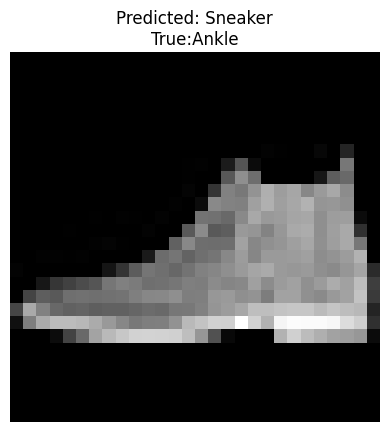

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Define class labels (0 to 9)

class_names = [ 'T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle', 'boot']

# Predict the labels for all test images

predictions = model.predict(x_test)

# select an image index from the test set

image_index = 0

# get predicted label and actual label

predicted_label = np.argmax(predictions[image_index])
true_label = y_test[image_index]

# print prediction result

print(f"Predicted Label: {class_names[predicted_label]}")
print(f"True Label: {class_names[true_label]}")
print(f"Predicted class name:{class_names[predicted_label]}")
print(f"True class name:{class_names[true_label]}")

#show the image

plt.imshow(x_test[image_index].reshape(28,28),cmap='gray')
plt.title(f"Predicted: {class_names[predicted_label]}\nTrue:{class_names[true_label]}")
plt.axis('off')
plt.show()


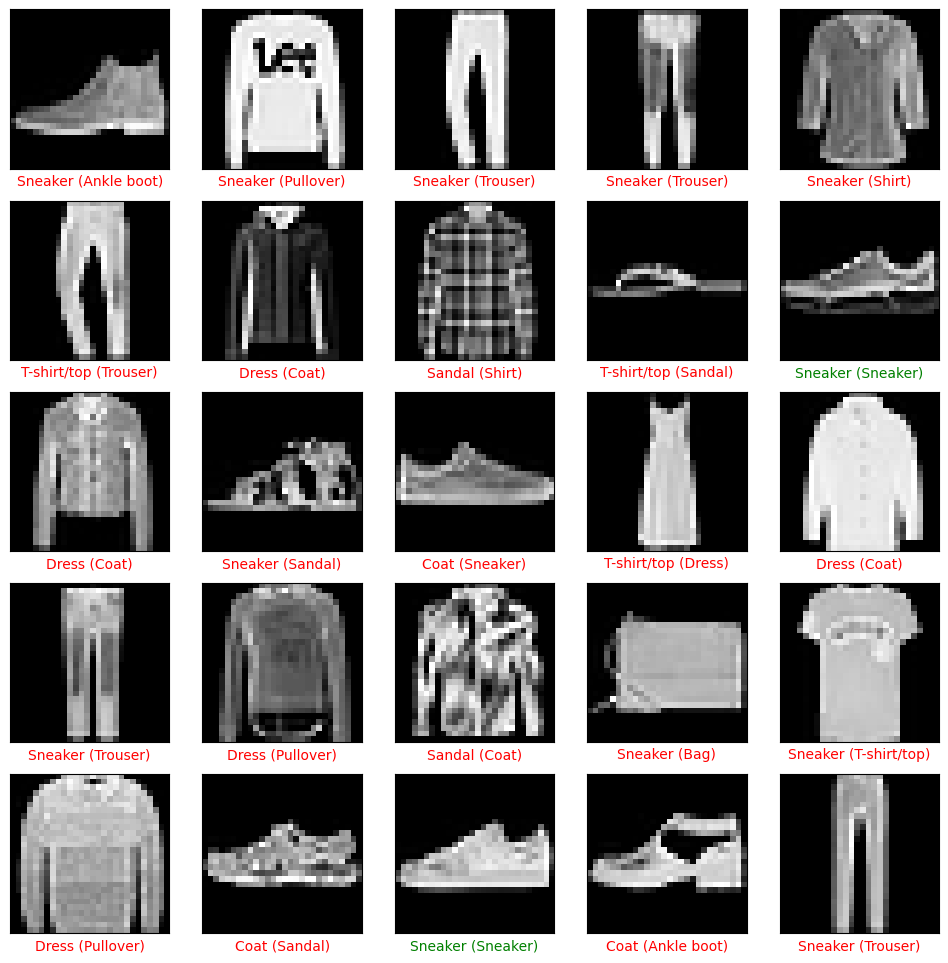

In [15]:
import matplotlib.pyplot as plt
import numpy as np

#Class names

class_names = [ 'T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

# Plot first 25 test images with predictions
plt.figure(figsize=(12, 12))

for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)

  img = x_test[i].reshape(28, 28)
  predicted_label = np.argmax(predictions[i])
  true_label = y_test[i]

  # show image
  plt.imshow(img, cmap='gray')

  # Green = correct, Red = wrong

  color = 'green' if predicted_label == true_label else 'red'
  plt.xlabel(f"{class_names[predicted_label]} ({class_names[true_label]})", color=color)

plt.show()

